# 1. Importing Libraries and Data

In [84]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [85]:
# Check matplotlib version

matplotlib.__version__

'3.7.0'

In [86]:
#path

path = r'C:\Users\Lucero\Documents\Adidas US Sales'

In [87]:
#import data

df = pd.read_csv(os.path.join(path,'Adidas Prepared Data','Sales_cleaned(1).csv'), index_col = False)


In [88]:
# Check the import

df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,"1,200",600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,"1,000",500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,"1,000",400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [89]:
# Columns list

df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

# 2. Creating a Subset

I am going to do an analysis with only numerical values. For this reason, I am going to create a data frame containing only the variables needed for this purpose.

In [90]:
df_sub = df[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']]

In [91]:
# Print the first 5 rows

df_sub.head()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,50.0,"1,200",600000.0,300000.0,0.50
1,50.0,"1,000",500000.0,150000.0,0.30
2,40.0,"1,000",400000.0,140000.0,0.35
3,45.0,850,382500.0,133875.0,0.35
4,60.0,900,540000.0,162000.0,0.30


In [92]:
# Check the size of the subset

df_sub.shape

(9648, 5)

# 3. Investigating relationships between variables

## 3.1 Correlation Matrix

### I am going to create a correlation matrix first.

In [93]:
df_sub.corr()

C:\Users\Lucero\AppData\Local\Temp\ipykernel_17140\2510699769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sub.corr()


,Price per Unit,Total Sales,Operating Profit,Operating Margin
Price per Unit,1.000000,0.435811,0.394546,-0.137486
Total Sales,0.435811,1.000000,0.956307,-0.364592
Operating Profit,0.394546,0.956307,1.000000,-0.211921
Operating Margin,-0.137486,-0.364592,-0.211921,1.000000


### Just from looking at the matrix we can see that there are some correlation coefficients very high and near to 1 and also values in the medium range.

## 3.2 Correlation Heatmap

C:\Users\Lucero\AppData\Local\Temp\ipykernel_17140\3368886210.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_sub.corr(), fignum=corr_figure.number) # Type of plot, correlation heatmap


Text(0.5, 1.0, 'Correlation Matrix')

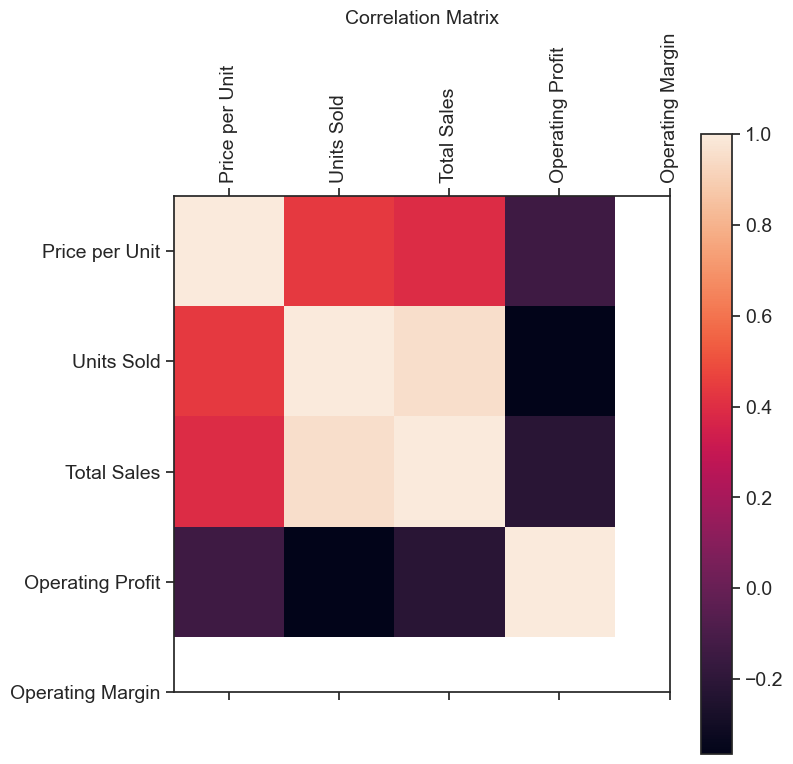

In [94]:
# add labels and a legend for the large correlation map

corr_figure = plt.figure(figsize=(8, 8)) # Size of the figure
plt.matshow(df_sub.corr(), fignum=corr_figure.number) # Type of plot, correlation heatmap
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
corr_cb = plt.colorbar() # add a colorbar
corr_cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title


##  I'm going to create the correlation heatmap using seaborn.

C:\Users\Lucero\AppData\Local\Temp\ipykernel_17140\3235778319.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)  # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.


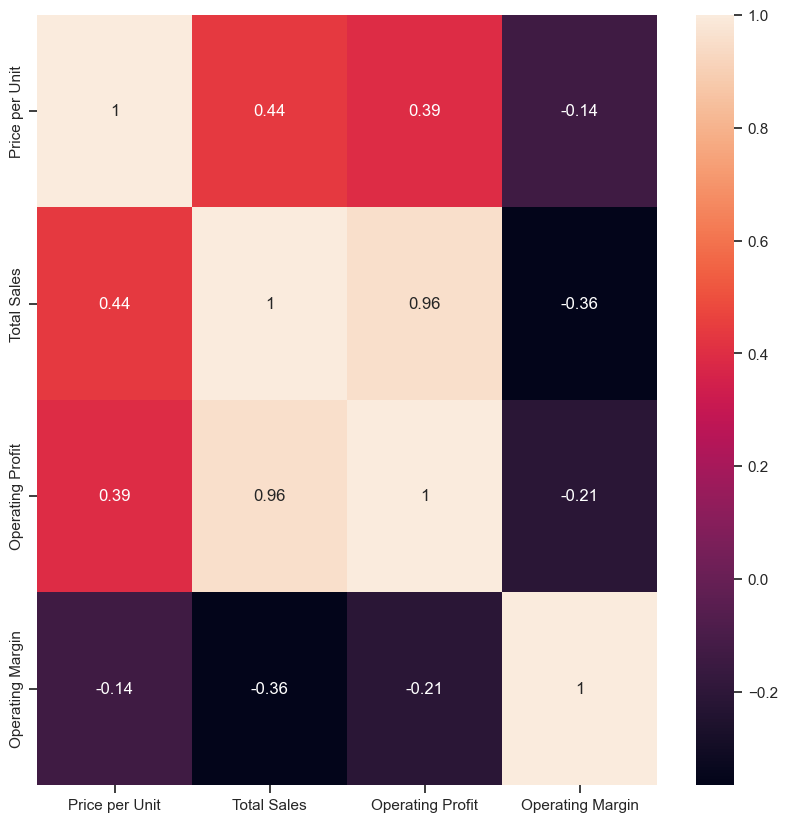

In [95]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)  # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

According to this heatmap, relationships are represented with the following colors:

1) Very Strong : Pink (the lightest color)
2) Fairly Strong: Orange
3) Moderate: Red
4) Weak: Purple
5) no relationship at all: Black
    
So based on the heatmap:
    
- Price per Unit

Fairly strong: Total Sales
Moderate: Operating Profit

- Total Sales

Fairly Strong: Price per Unit
Strong relationship: Operating Profit

- Operating Profit

Moderate: Price per Unit
Strong relationship: Total Sales
Weak: Operating Margin

- Operating Margin

Weak: Price per Unit, Operating Profit

Based on the results above, I think the following relationships sound promising for the analysis and should be investigated further:

- Price per Unit and Total Sales
- Price per Unit and Operating Profit
- Total Sales and Operating Profit

# 3.3 Scatterplots

## Price per Unit and Total Sales

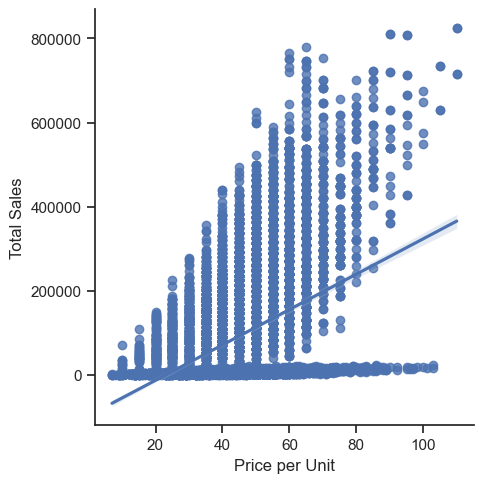

In [96]:
# Look at the correlation between Price per Unit and Total Sales

scatter_unit_sales = sns.lmplot(x = 'Price per Unit', y = 'Total Sales', data = df_sub)

## Price per Unit and Operating Profit

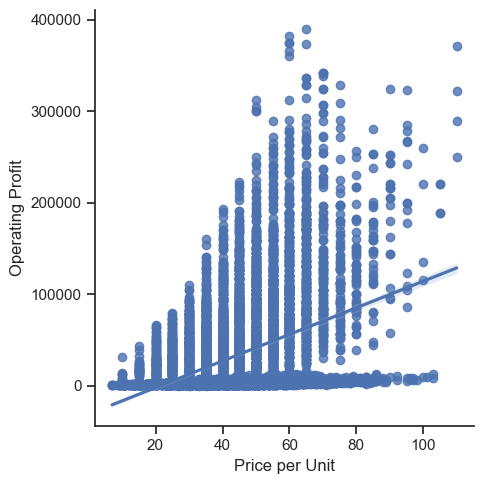

In [97]:
# Look at the correlation between Price per Unit and Operating Profit

scatter_unit_profit = sns.lmplot(x = 'Price per Unit', y = 'Operating Profit', data = df_sub)

## Total Sales and Operating Profit

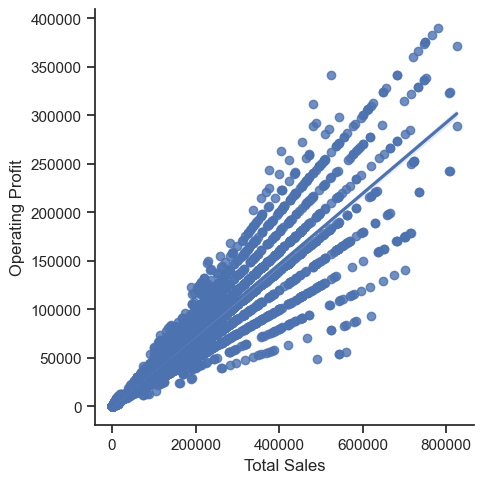

In [98]:
# Look at the correlation between Total Sales and Operating Profit

scatter_sales_profit = sns.lmplot(x = 'Total Sales', y = 'Operating Profit', data = df_sub)

# 3.4 Pair Plots

In [99]:
# Creating a dataframe 

df_sub_pair = df_sub[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']]

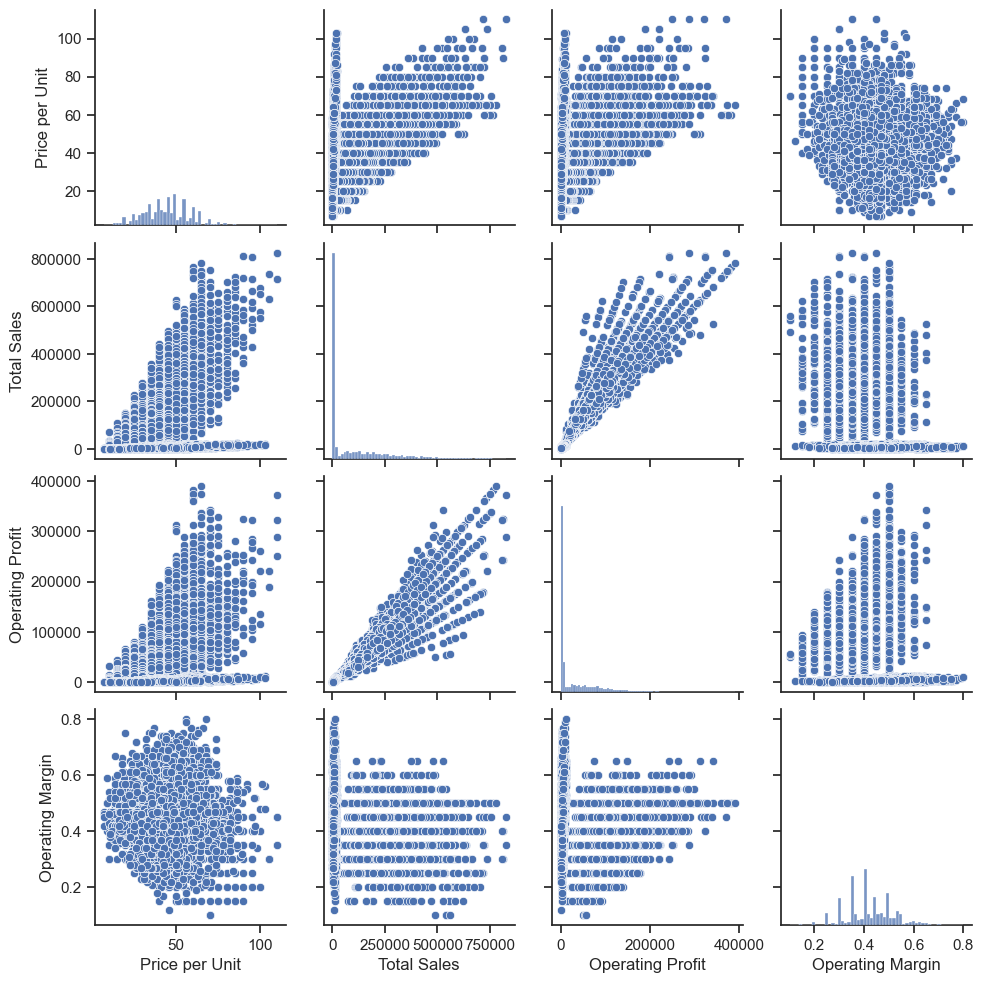

In [100]:
# Create the pair plot

pair = sns.pairplot(df_sub_pair)

# 3.5 Categorical plots

<Axes: xlabel='Price per Unit', ylabel='Count'>

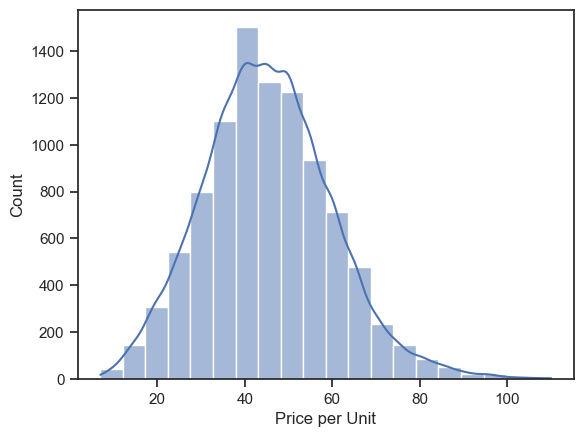

In [101]:
# Create a histogram for the Price per Unit column

sns.histplot(df_sub_pair['Price per Unit'], bins = 20, kde = True)

Based on this, I can create the following categories:

- “Low price” < 20
- “Medium price” >= 20 and <50
- “High price” >= 50

### Knowing the real distribution now, the new variable on the df_sub_pair dataframe can be created.

In [102]:
# Create the first category

df_sub_pair.loc[df_sub_pair['Price per Unit'] < 20, 'Price per Unit Group'] = 'Low'


In [103]:
# Create the second category

df_sub_pair.loc[(df_sub_pair['Price per Unit'] >= 20) & (df['Price per Unit'] < 50), 'Price per Unit Group'] = 'Middle'


In [104]:
# Create the last category

df_sub_pair.loc[df_sub_pair['Price per Unit'] >= 50, 'Price per Unit Group'] = 'High'


In [105]:
# Check the results

df_sub_pair.head(10)

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Price per Unit Group
0,50.0,"1,200",600000.0,300000.0,0.50,High
1,50.0,"1,000",500000.0,150000.0,0.30,High
2,40.0,"1,000",400000.0,140000.0,0.35,Middle
3,45.0,850,382500.0,133875.0,0.35,Middle
4,60.0,900,540000.0,162000.0,0.30,High
5,50.0,"1,000",500000.0,125000.0,0.25,High
6,50.0,"1,250",625000.0,312500.0,0.50,High
7,50.0,900,450000.0,135000.0,0.30,High
8,40.0,950,380000.0,133000.0,0.35,Middle
9,45.0,825,371250.0,129938.0,0.35,Middle


In [106]:
# check the column

df_sub_pair['Price per Unit Group'].value_counts(dropna = False)

Middle    5564
High      3777
Low        307
Name: Price per Unit Group, dtype: int64

In [107]:
df_sub_pair['Price per Unit'].value_counts(dropna = False)

50.0     675
55.0     589
45.0     588
40.0     534
60.0     457
        ... 
97.0       2
88.0       2
101.0      1
98.0       1
8.0        1
Name: Price per Unit, Length: 94, dtype: int64

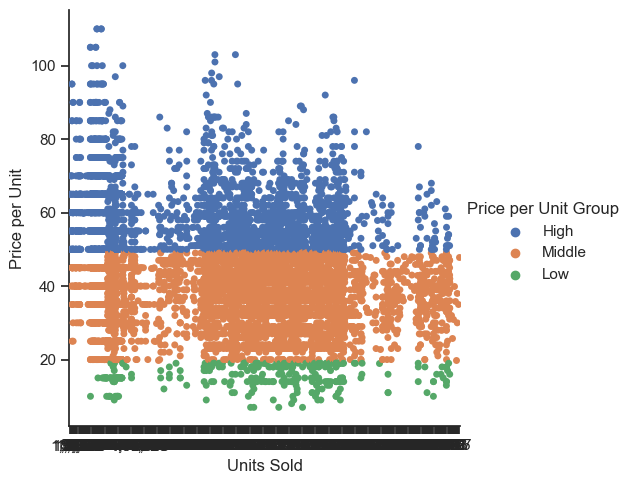

In [108]:
# Create a categorical plot

sns.set(style="ticks")
categorical = sns.catplot(x= "Units Sold", y= "Price per Unit", hue= "Price per Unit Group", data= df_sub_pair)

### The green dots below the number 20 indicate that the lowest price per unit is not the most sold units, however the blue dots that are obviously more are the most sold units.

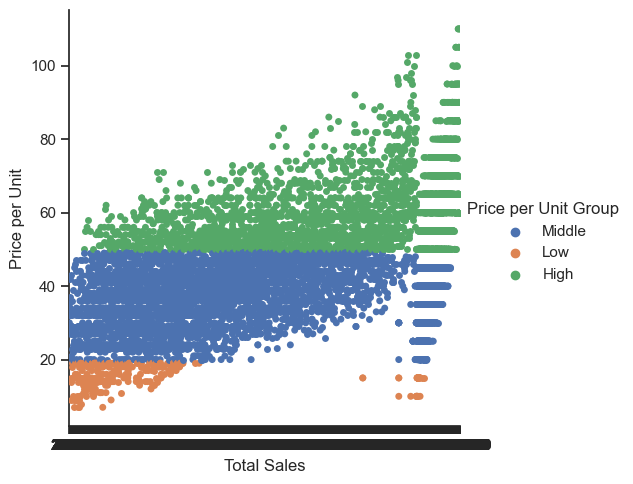

In [109]:
# Create a categorical plot

sns.set(style="ticks")
categorical_2 = sns.catplot(x= "Total Sales", y= "Price per Unit", hue= "Price per Unit Group", data= df_sub_pair)

### As in this graph, the blue points that determine the middle group of the price per unit is the second most sold group in Adidas, since by the green points it can be deduced for now that people are not affected much by paying a high price in this brand.

# 4. Key Questions


- Does the price of products affect the buying behavior of consumers?m
According to my analysis, consumers don't mind paying a high price for this brand, since the minor sales come from not very expensive products.

- What type of correlation does Total Sales and Operating Profit have?

According to the graphs, it can be deduced that they have a positive correlation, which makes sense, since the more total sales, the greater the profit of the business.

- How is the correlation of the operating margin with the price per unit?
The correlation of these two variables is not positive, it is actually weak.

- How is the correlation of the Price per Unit and the Total Sales?
In this case it has been possible to deduce that the correlation between the Price per Unit and Total Sales is Moderate. This is because the graph is not linear, but the points are a little scattered.

- What kind of correlation exists between the Operating Profit and the Operating Margin?
According to my analysis, the correlation between the variables Operating Profit and Operating Margin is Moderate, almost Weak.
    
    

# 5. Hypothesis

### Hypothesis 1:

If the unit price is increased, people will continue to buy the products.

### Hypothesis 2:
If a higher operating profit is obtained, it is due to a special event or vacation.

### Hypothesis 3:
If there is a greater operating benefit, it is due to the greater number of products for women made.

### Hypothesis 4:

If it presents a higher operating margin, it is due to the greater amount of Total Sales made.

# 6. Saving Charts

In [113]:
corr.figure.savefig(os.path.join(path, '06.Visualizations','correlation_heatmap.png'), bbox_inches='tight')

In [115]:
scatter_unit_sales.figure.savefig(os.path.join(path, '06.Visualizations','scatterplot_gdp_population.png'), bbox_inches='tight')

In [116]:
scatter_unit_profit.figure.savefig(os.path.join(path, '06.Visualizations','correlation_heatmap.png'), bbox_inches='tight')

In [117]:
scatter_sales_profit.figure.savefig(os.path.join(path, '06.Visualizations','correlation_heatmap.png'), bbox_inches='tight')

In [118]:
pair.figure.savefig(os.path.join(path, '06.Visualizations','correlation_heatmap.png'), bbox_inches='tight')

In [119]:
categorical.figure.savefig(os.path.join(path, '06.Visualizations','correlation_heatmap.png'), bbox_inches='tight')

In [120]:
categorical_2.figure.savefig(os.path.join(path, '06.Visualizations','correlation_heatmap.png'), bbox_inches='tight')